# Time Series Analysis

## Housing Prices

### Lynn Anderson

# Overview

The aim of this project was to .... TS models are .........




# Business Understanding


# Data Understanding

The dataset consisted of a csv file obtained from Zillow.



# Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings

from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

%matplotlib inline

In [3]:
df = pd.read_csv("data/zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
ca = df.loc[df['State'] == 'CA']
ca.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
15,96107,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,16,152500.0,152600.0,152600.0,...,579300,585700,590900,594700,598500,601300,602800,606100,612400,616200
27,97771,94565,Pittsburg,CA,San Francisco,Contra Costa,28,139200.0,138300.0,137500.0,...,394900,398400,401600,405400,408600,410900,413700,417900,424300,430100
30,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,31,340600.0,341700.0,343000.0,...,1839800,1861100,1888600,1903900,1907500,1922100,1952400,1974500,1975900,1966900
64,97711,94501,Alameda,CA,San Francisco,Alameda,65,222400.0,222300.0,222400.0,...,965100,975000,987800,1000000,1009900,1021000,1032400,1042000,1053000,1059700


In [48]:
ca['Metro'].value_counts()

Los Angeles-Long Beach-Anaheim    347
San Francisco                     134
Riverside                         116
Sacramento                         92
San Diego                          87
San Jose                           55
Fresno                             40
Bakersfield                        27
Santa Rosa                         25
Stockton                           25
Ventura                            23
Modesto                            19
Visalia                            19
Santa Maria-Santa Barbara          18
San Luis Obispo                    18
Salinas                            16
Santa Cruz                         12
Chico                              12
Vallejo                            11
Eureka                             11
Merced                             10
Madera                              9
Truckee                             8
Redding                             8
Yuba City                           8
Clearlake                           8
Napa        

In [49]:
ca['CountyName'].value_counts()

Los Angeles        264
San Diego           87
Orange              83
Riverside           60
San Bernardino      56
Santa Clara         52
Sacramento          46
Alameda             43
Fresno              40
Contra Costa        31
Kern                27
San Mateo           25
Sonoma              25
San Joaquin         25
Ventura             23
Placer              22
Stanislaus          19
San Francisco       19
Tulare              19
San Luis Obispo     18
Santa Barbara       18
El Dorado           16
Marin               16
Monterey            16
Santa Cruz          12
Butte               12
Solano              11
Humboldt            11
Merced              10
Madera               9
Yolo                 8
Shasta               8
Amador               8
Siskiyou             8
Lake                 8
Calaveras            8
Nevada               8
Napa                 7
Mendocino            6
Plumas               6
Imperial             5
Yuba                 4
Sutter               4
Kings      

In [47]:
bay_area = ca.loc[(ca['Metro'] == 'Santa Jose') | (ca['Metro'] == 'San Francisco')]
bay_area

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
27,97771,94565,Pittsburg,CA,San Francisco,Contra Costa,28,139200.0,138300.0,137500.0,...,394900,398400,401600,405400,408600,410900,413700,417900,424300,430100
64,97711,94501,Alameda,CA,San Francisco,Alameda,65,222400.0,222300.0,222400.0,...,965100,975000,987800,1000000,1009900,1021000,1032400,1042000,1053000,1059700
76,97565,94110,San Francisco,CA,San Francisco,San Francisco,77,213900.0,214800.0,216000.0,...,1503000,1506400,1513500,1525200,1533600,1536500,1536200,1544400,1570000,1594000
186,97743,94536,Fremont,CA,San Francisco,Alameda,187,223200.0,223200.0,223300.0,...,960100,968200,978000,989600,1002400,1018700,1033100,1045400,1061200,1072700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12604,97525,94038,Moss Beach,CA,San Francisco,San Mateo,12605,328100.0,329100.0,330300.0,...,1036000,1035900,1042700,1071300,1118600,1174800,1217000,1244200,1263400,1278500
13144,97895,94957,Ross,CA,San Francisco,Marin,13145,755900.0,754600.0,753300.0,...,3004000,2985800,2970500,2940900,2898900,2903900,2942800,2974000,2964700,2949400
13873,97511,94020,La Honda,CA,San Francisco,San Mateo,13874,NaN,NaN,NaN,...,751500,759500,751000,745200,754000,776900,793900,806000,832900,858500
14096,97904,94973,Woodacre,CA,San Francisco,Marin,14097,276400.0,277100.0,277900.0,...,819700,832900,841400,846300,852100,854300,852000,849300,848100,846200


In [8]:
bay_area['CountyName'].value_counts()

Alameda          43
Contra Costa     31
San Mateo        25
San Francisco    19
Marin            16
Name: CountyName, dtype: int64

In [10]:
bay_area['RegionName'].value_counts()

94109    1
94704    1
94949    1
94563    1
94618    1
        ..
94901    1
94606    1
94025    1
94521    1
94970    1
Name: RegionName, Length: 134, dtype: int64

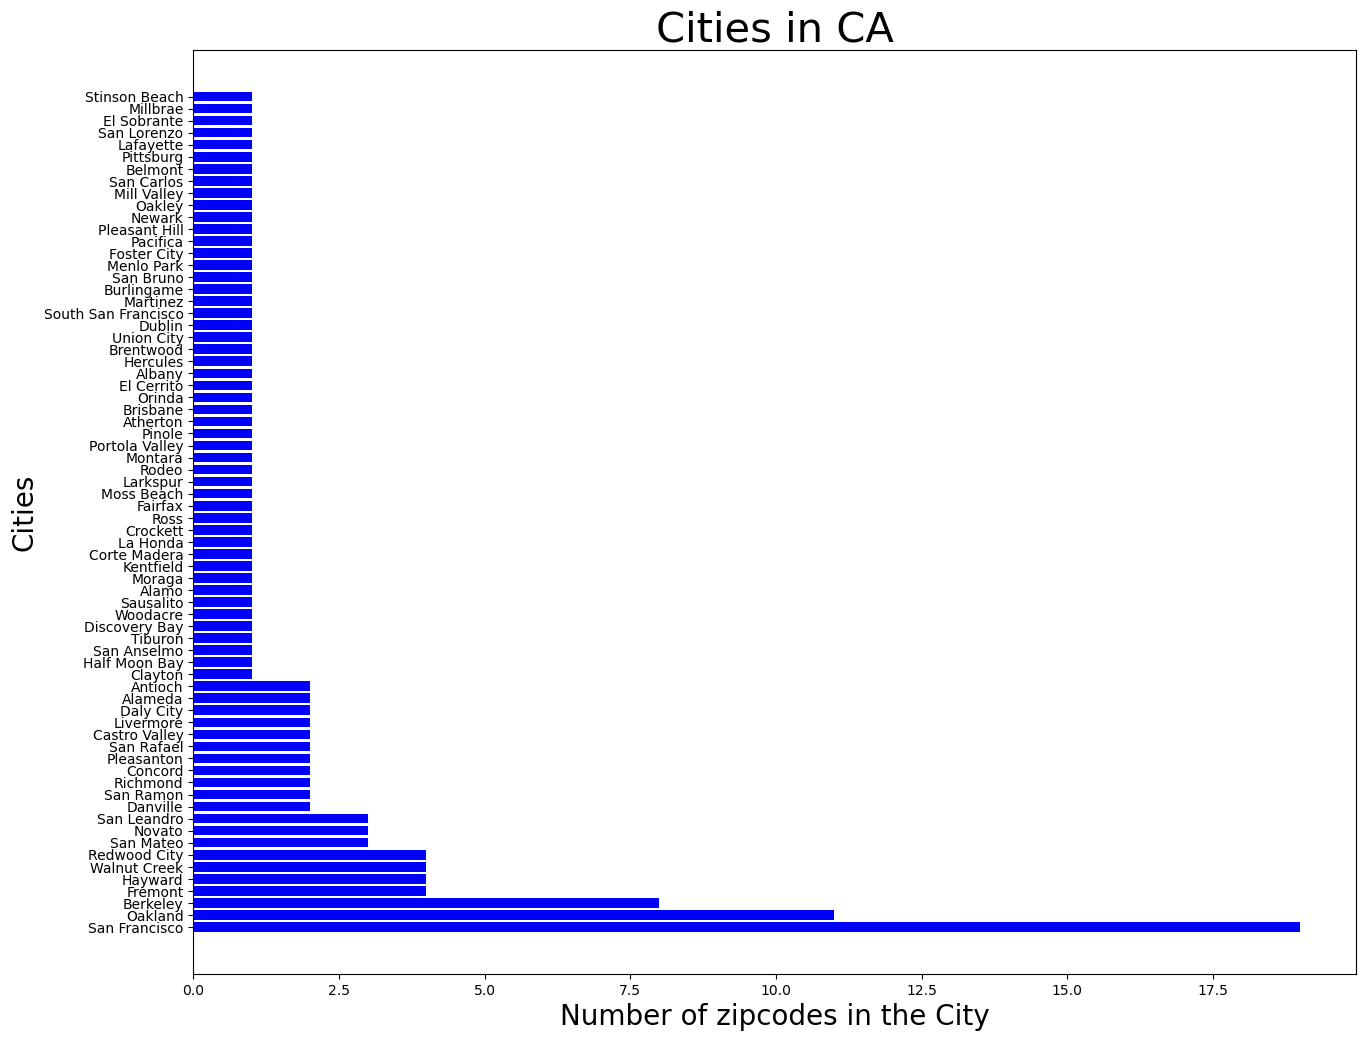

In [11]:
#Visualizing the value counts of zipcodes in each city in the Miami-Dade county

fig, ax = plt.subplots(figsize=(15,12))

y = [a for a in bay_area['City'].value_counts()]

x = [a for a in bay_area['City'].value_counts().keys()]

ax.barh(x,y,color='blue')
ax.set_title('Cities in CA',fontsize=30)
ax.set_ylabel('Cities',fontsize=20)
ax.set_xlabel('Number of zipcodes in the City',fontsize=20);

In [14]:
bay_area_roi.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,roi_since11
1853,97850,94804,Richmond,CA,San Francisco,Contra Costa,1854,171300.0,170300.0,169400.0,...,434100,438900,441700,443900,448000,452400,459200,471800,483100,1.904991
1681,97808,94606,Oakland,CA,San Francisco,Alameda,1682,120400.0,120300.0,120300.0,...,611000,622300,632800,646100,663100,676500,683700,691700,696800,1.735768
7354,97851,94805,Richmond,CA,San Francisco,Contra Costa,7355,160600.0,158900.0,157200.0,...,546600,549800,551700,554200,559500,564800,570100,580400,591500,1.672842
3505,97537,94063,Redwood City,CA,San Francisco,San Mateo,3506,203000.0,203900.0,204800.0,...,996100,1015900,1037100,1071500,1113900,1147200,1172200,1196400,1213800,1.665349
1477,97803,94601,Oakland,CA,San Francisco,Alameda,1478,114600.0,114500.0,114500.0,...,506600,514100,521100,526700,535800,546900,555000,562000,566700,1.663064


C:\Users\lalyn\AppData\Local\Temp\ipykernel_11060\4014752878.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 90)


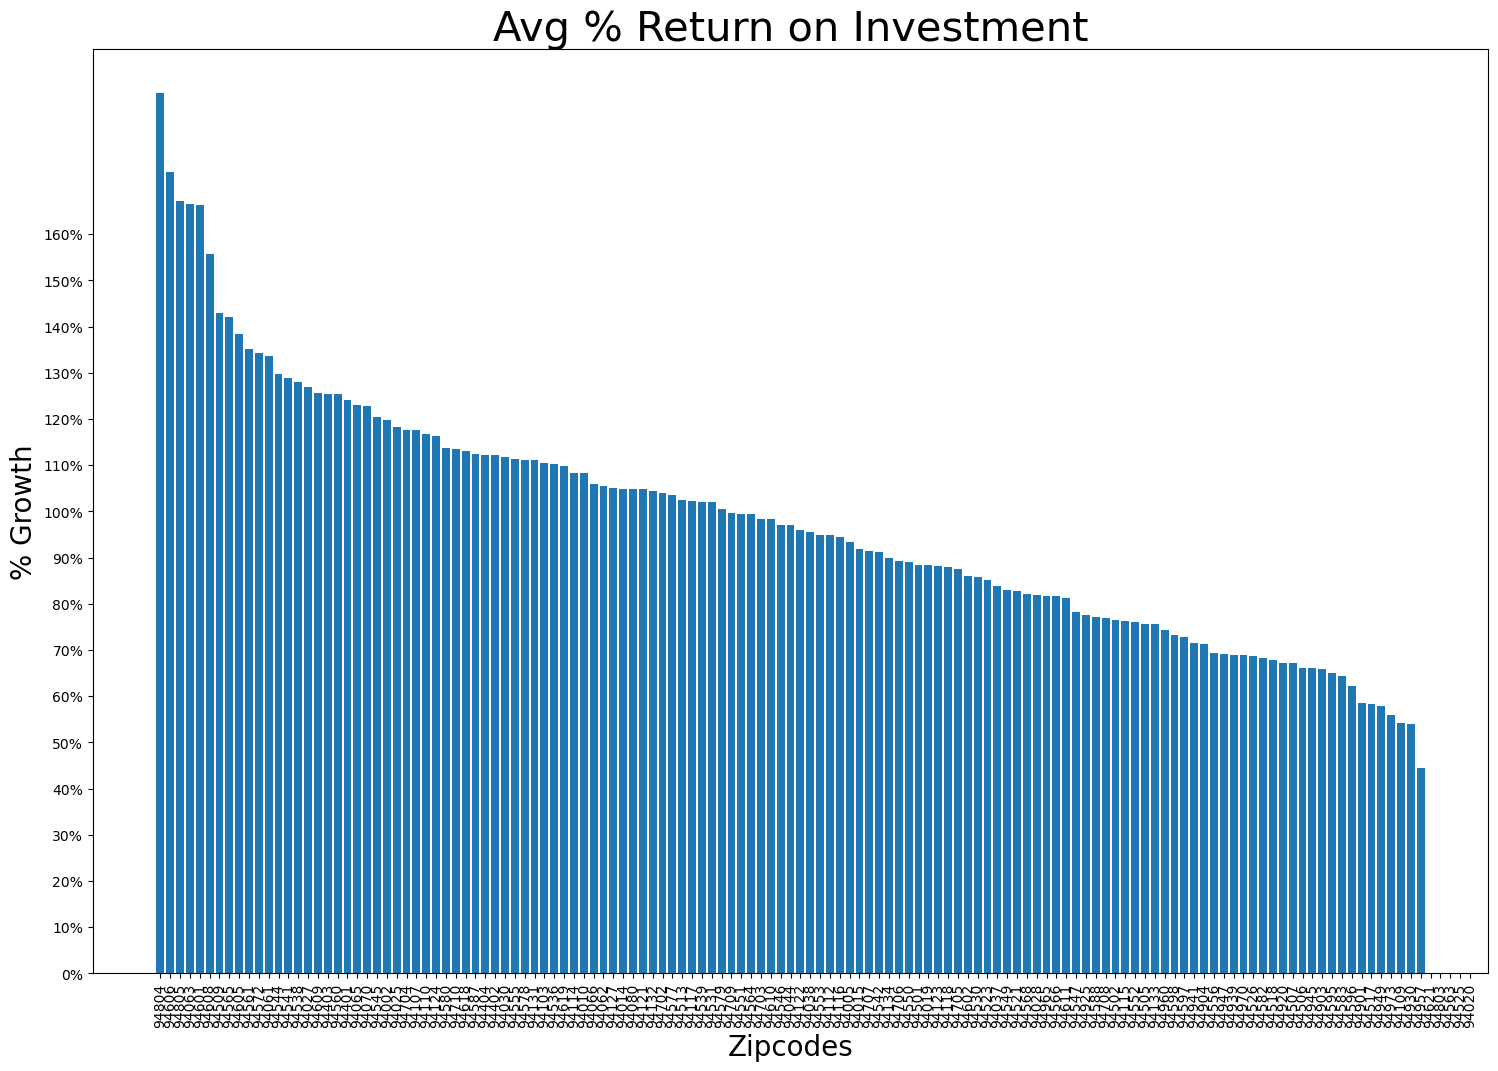

In [45]:
bay_area_roi = bay_area.copy()
bay_area_roi['roi_since11'] = None
#bay_area_roi['roi_since11'] = bay_area_roi['2018-04'].apply(lambda x : ((x - bay_area_roi['2011-01'])/(bay_area_roi['2011-01'])))
bay_area_roi['roi_since11'] = (bay_area_roi['2018-04'] - bay_area_roi['2011-01'])/(bay_area_roi['2011-01'])
bay_area_roi = bay_area_roi.sort_values('roi_since11',ascending=False)


fig,ax=plt.subplots(figsize=(18,12))

#x_labels = bay_area_roi['RegionName']
x_labels = [str(a) for a in bay_area_roi['RegionName']]
x = [str(a) for a in bay_area_roi['RegionName']]
y = [a for a in bay_area_roi['roi_since11']]

ax.bar(x,y)

#ax.set_xticks(a for a in bay_area_roi['RegionName'].keys())
ax.set_xticklabels(x_labels, rotation = 90)
ax.set_yticks([a/10 for a in list(range(0,17,1))])
ax.set_yticklabels([str(a*10)+'%' for a in list(range(0,17,1))])
ax.set_ylabel('% Growth',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on Investment',fontsize='30');

In [22]:
bay_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 9 to 14641
Columns: 273 entries, RegionID to roi_since11
dtypes: float64(220), int64(49), object(4)
memory usage: 290.9+ KB


In [23]:
bay_area.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,roi_since11
count,134.000000,134.000000,134.000000,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,...,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,129.000000
mean,99972.738806,94471.649254,4178.216418,3.032383e+05,3.034758e+05,3.038219e+05,3.042758e+05,3.048719e+05,3.056617e+05,3.067680e+05,...,1.265854e+06,1.275779e+06,1.287728e+06,1.300552e+06,1.315490e+06,1.329636e+06,1.341684e+06,1.353951e+06,1.361623e+06,0.980879
std,26085.811356,290.812584,3413.749125,1.645023e+05,1.655236e+05,1.666030e+05,1.677386e+05,1.689127e+05,1.701636e+05,1.715493e+05,...,8.506488e+05,8.552763e+05,8.618705e+05,8.680477e+05,8.763365e+05,8.858963e+05,8.918301e+05,8.948438e+05,8.963363e+05,0.270458
min,97498.000000,94002.000000,10.000000,1.146000e+05,1.145000e+05,1.145000e+05,1.144000e+05,1.144000e+05,1.144000e+05,1.144000e+05,...,3.674000e+05,3.716000e+05,3.766000e+05,3.819000e+05,3.874000e+05,3.904000e+05,3.931000e+05,3.997000e+05,4.055000e+05,0.444722
25%,97577.250000,94123.250000,1468.250000,1.975750e+05,1.976500e+05,1.977500e+05,1.984000e+05,1.998500e+05,1.997500e+05,1.999750e+05,...,7.716000e+05,7.754750e+05,7.843250e+05,7.961500e+05,8.081000e+05,8.192750e+05,8.301250e+05,8.370750e+05,8.479500e+05,0.768397
50%,97755.000000,94546.500000,3554.000000,2.692500e+05,2.692000e+05,2.689000e+05,2.687500e+05,2.688500e+05,2.696000e+05,2.708000e+05,...,9.949000e+05,1.006450e+06,1.015700e+06,1.026000e+06,1.038400e+06,1.050300e+06,1.061250e+06,1.074250e+06,1.084750e+06,0.970070
75%,97811.750000,94608.750000,6355.250000,3.368250e+05,3.369500e+05,3.343250e+05,3.331500e+05,3.342750e+05,3.367750e+05,3.390500e+05,...,1.512700e+06,1.531650e+06,1.546275e+06,1.556800e+06,1.582925e+06,1.597375e+06,1.604900e+06,1.619950e+06,1.632350e+06,1.124098
max,399681.000000,94973.000000,14642.000000,1.179200e+06,1.184300e+06,1.189700e+06,1.195400e+06,1.201200e+06,1.207300e+06,1.214100e+06,...,6.197800e+06,6.250200e+06,6.315400e+06,6.429100e+06,6.581800e+06,6.705000e+06,6.764600e+06,6.788400e+06,6.796500e+06,1.904991


In [24]:
bay_area.isnull().sum()

RegionID       0
RegionName     0
City           0
State          0
Metro          0
              ..
2018-01        0
2018-02        0
2018-03        0
2018-04        0
roi_since11    5
Length: 273, dtype: int64

In [25]:
bay_area['RegionName'].nunique()

134

In [26]:
bay_area['City'].nunique()

70

In [27]:
bay_area['Metro'].nunique()

1

def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

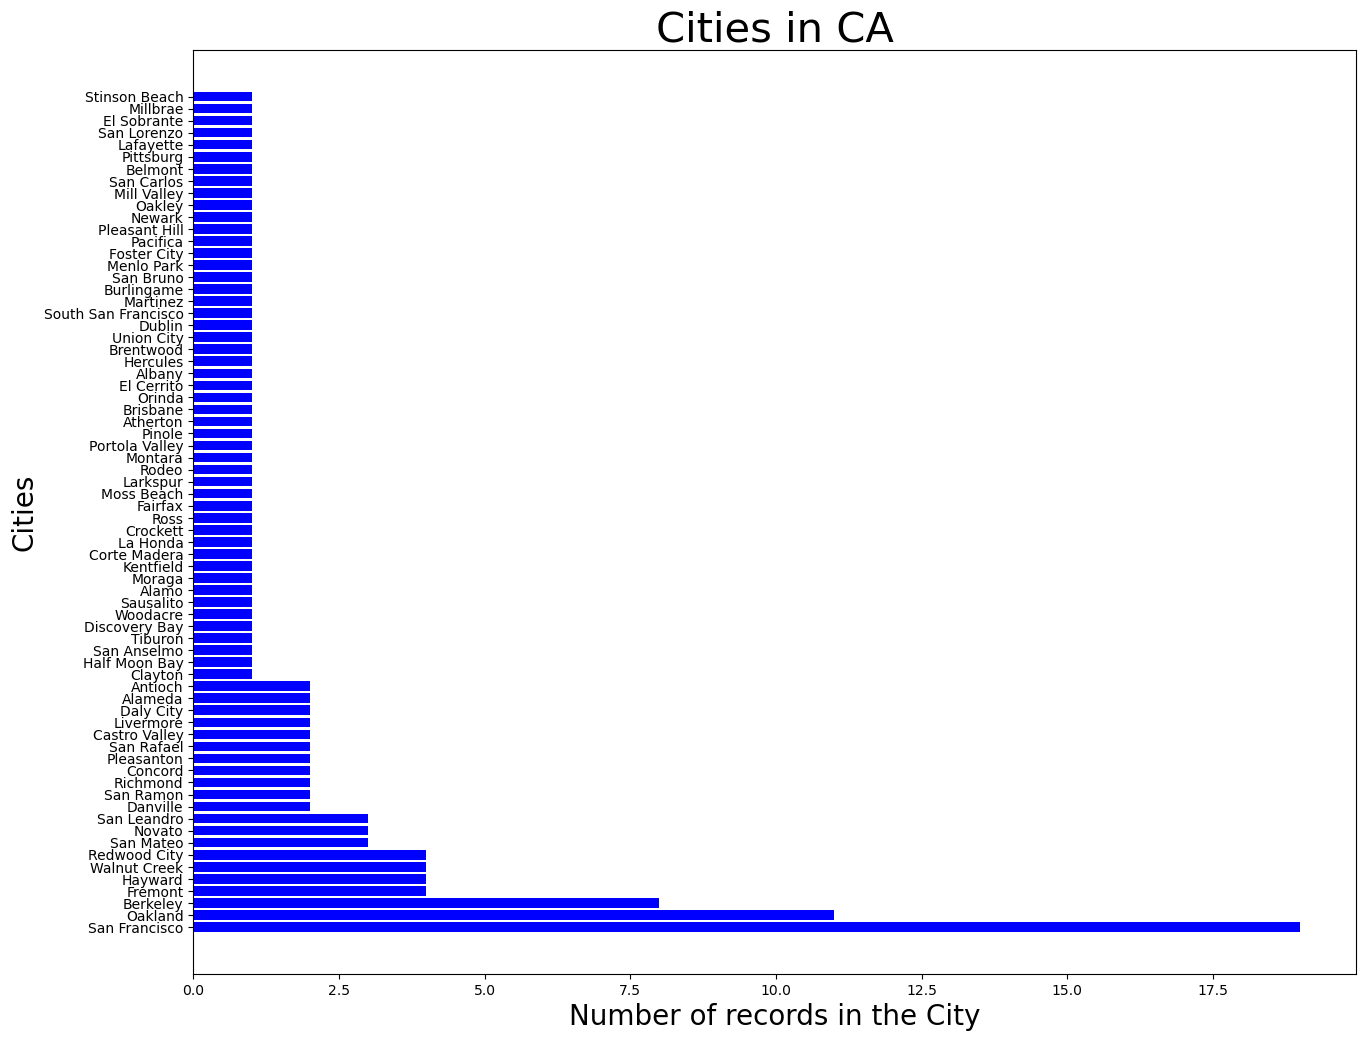

In [29]:
#Visualizing the value counts of zipcodes in each city in the Miami-Dade county

fig, ax = plt.subplots(figsize=(15,12))

y = [a for a in bay_area['City'].value_counts()]

x = [a for a in bay_area['City'].value_counts().keys()]

ax.barh(x,y,color='blue')
ax.set_title('Cities in CA',fontsize=30)
ax.set_ylabel('Cities',fontsize=20)
ax.set_xlabel('Number of records in the City',fontsize=20);

# Data Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

### Reshape wide to long

In [43]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [48]:
#long_df = melt_data(bay_area)
#long_df.head()

,value
time,
1996-04-01,303238.28125
1996-05-01,303475.78125
1996-06-01,303821.87500
1996-07-01,304275.78125
1996-08-01,304871.87500


In [50]:
#Dataframe containining historical prices of the Zip Code.

zip94804 = df[df['RegionName']==94804]
# Time Series dataframe of Zip Code prices

series94804 = melt_data(zip94804)
#Observing our Time Series dataframe

series94804

,value
time,
1996-04-01,171300.0
1996-05-01,170300.0
1996-06-01,169400.0
1996-07-01,168500.0
1996-08-01,167600.0
...,...
2017-12-01,448000.0
2018-01-01,452400.0
2018-02-01,459200.0


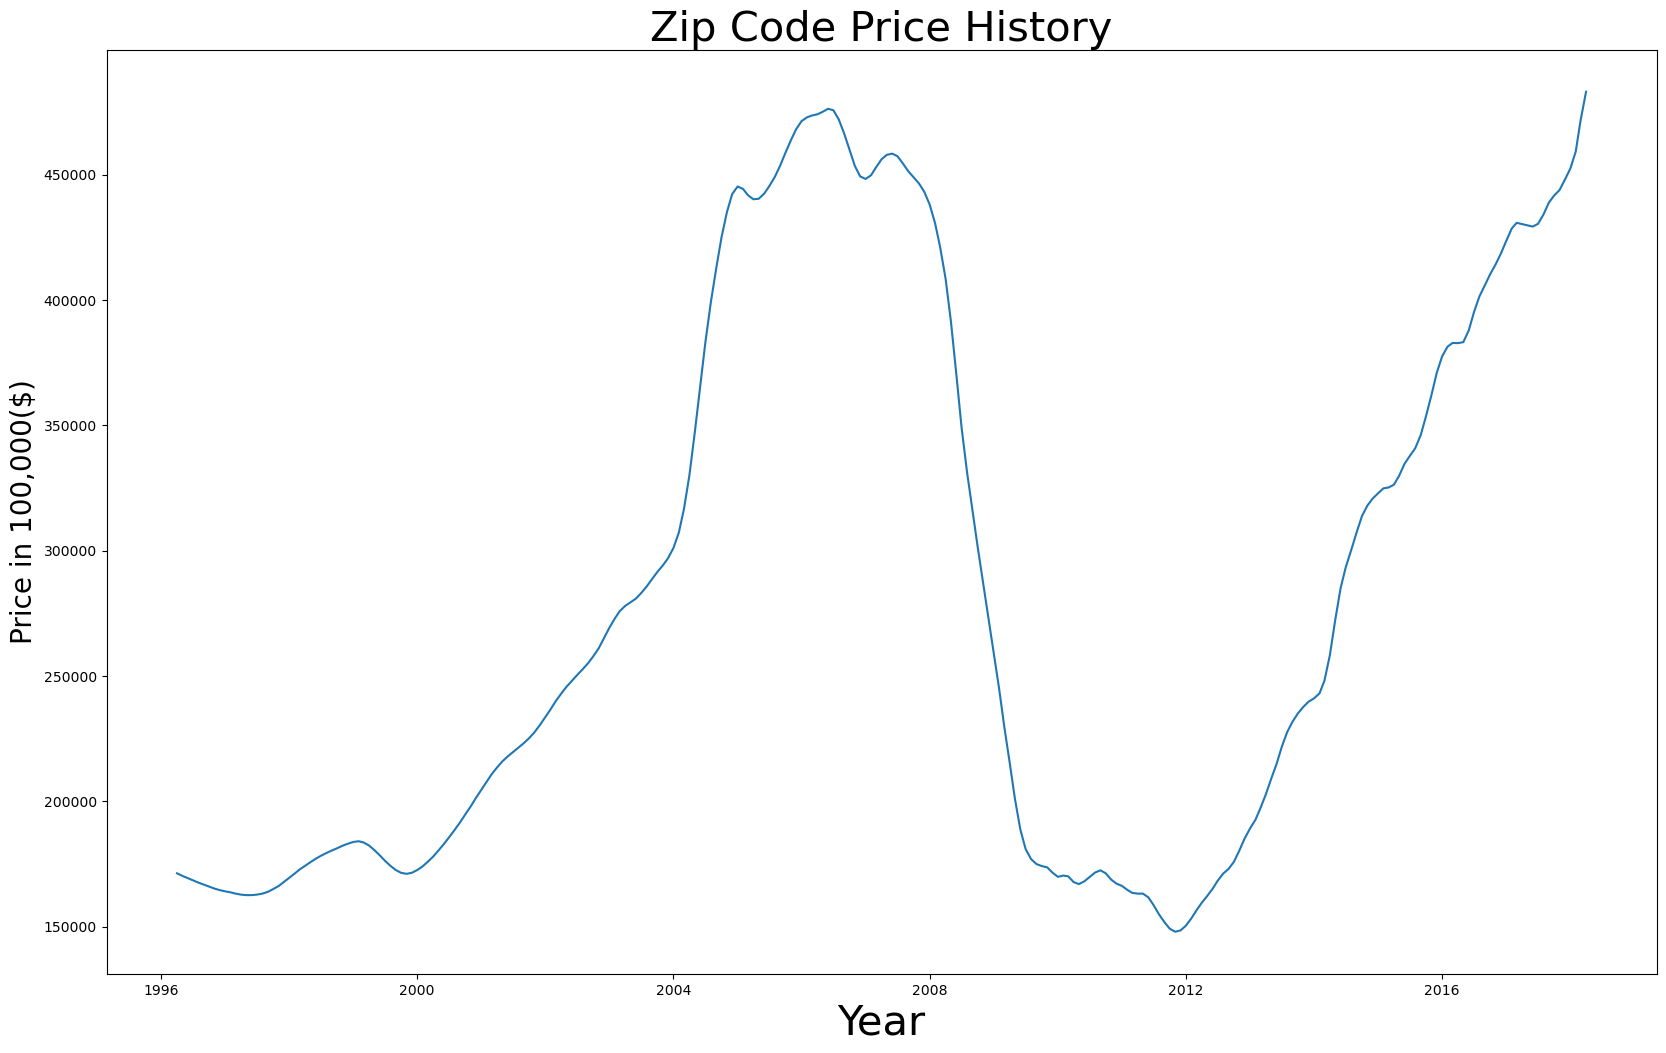

In [51]:
#Visualizing our Time Series Data for zipcode- 33126

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(series94804)

ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Price in 100,000($)',fontsize=20)
ax.set_title('Zip Code Price History',fontsize=30);

In [52]:
series94804.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='time', length=265, freq=None)

In [53]:
series94804.isnull().sum()

value    0
dtype: int64

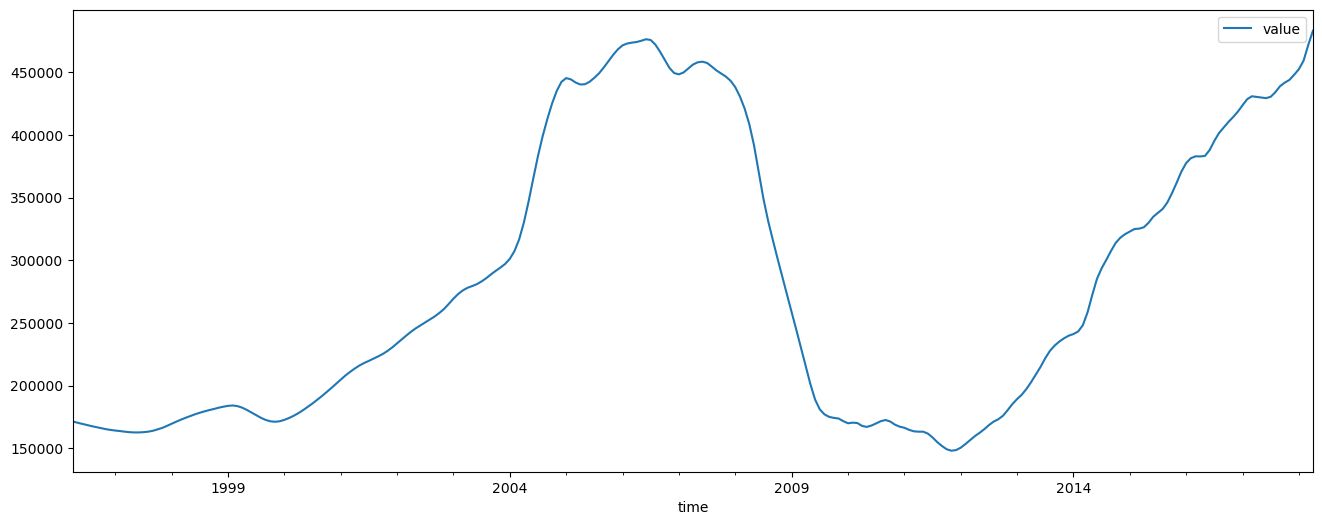

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

series94804.plot(figsize = (16,6));

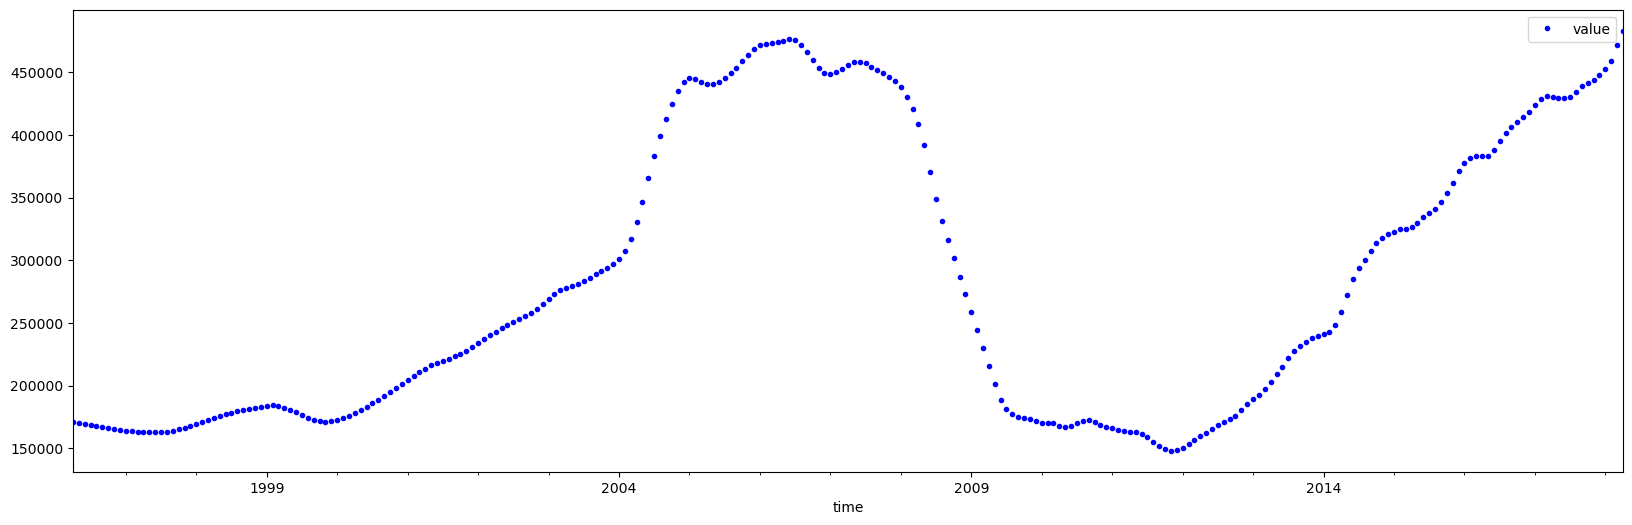

In [55]:
series94804.plot(figsize = (20,6), style = '.b');


In [56]:
year_groups = series94804.groupby(pd.Grouper(freq ='A'))
# Create a new DataFrame and store yearly values in columns 
df_annual = pd.DataFrame()

for yr, group in year_groups:
    df_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
df_annual.plot(figsize = (13,8), subplots=True, legend=True);

ValueError: Length of values (12) does not match length of index (9)

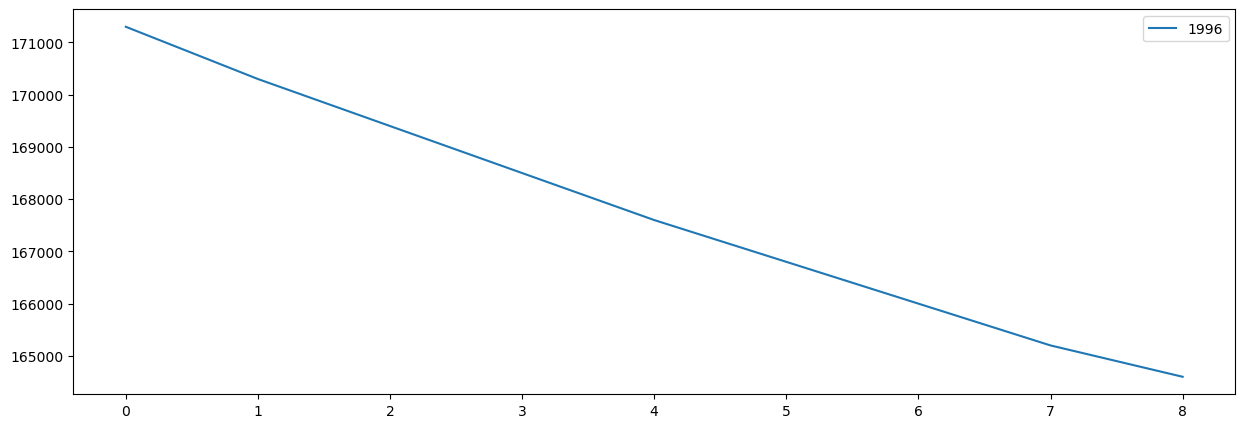

In [57]:
df_annual.plot(figsize = (15,5), subplots=False, legend=True);


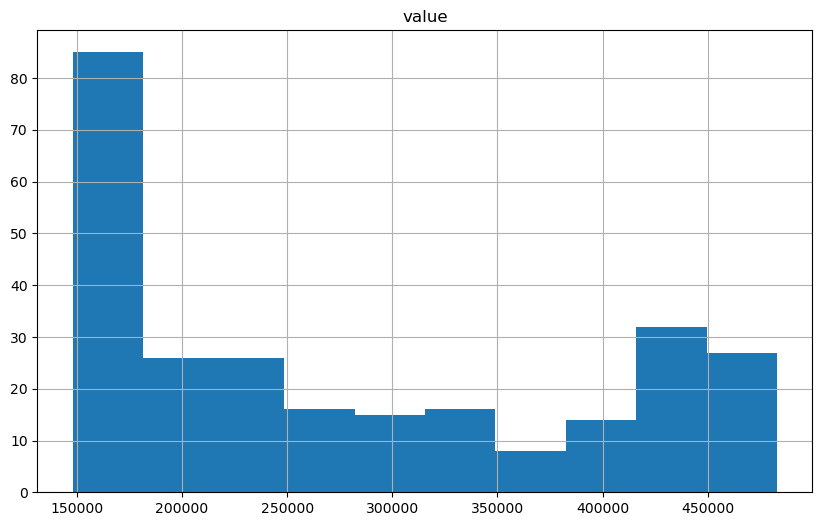

In [58]:
series94804.hist(figsize = (10,6));


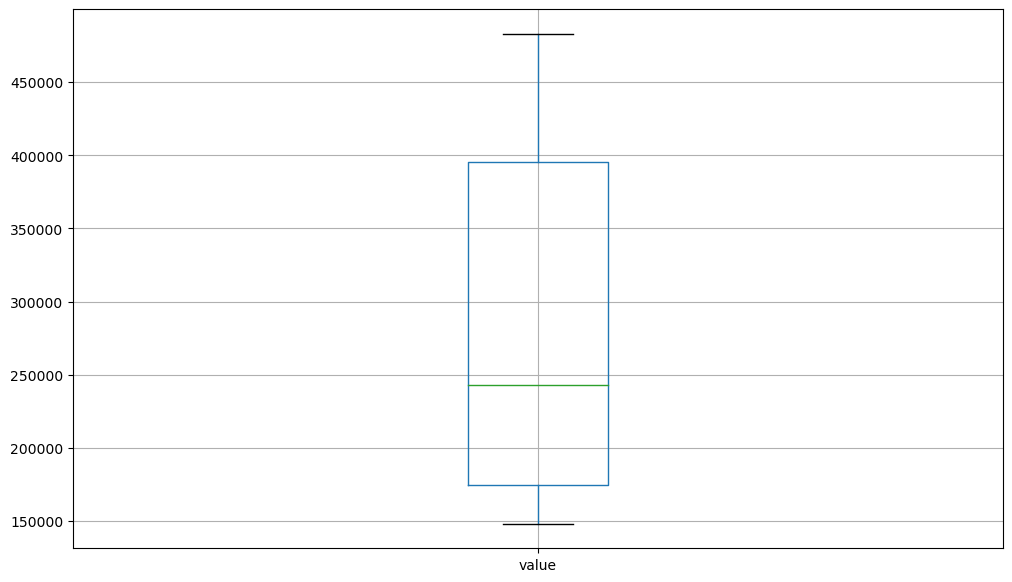

In [59]:
series94804.boxplot(figsize = (12,7));


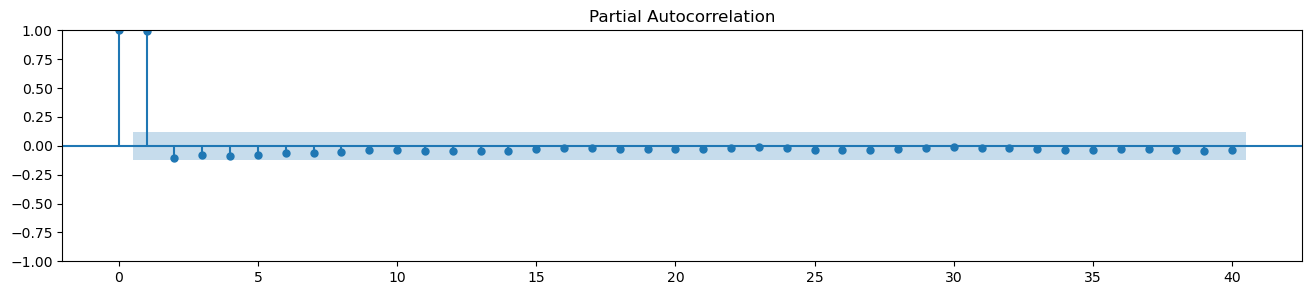

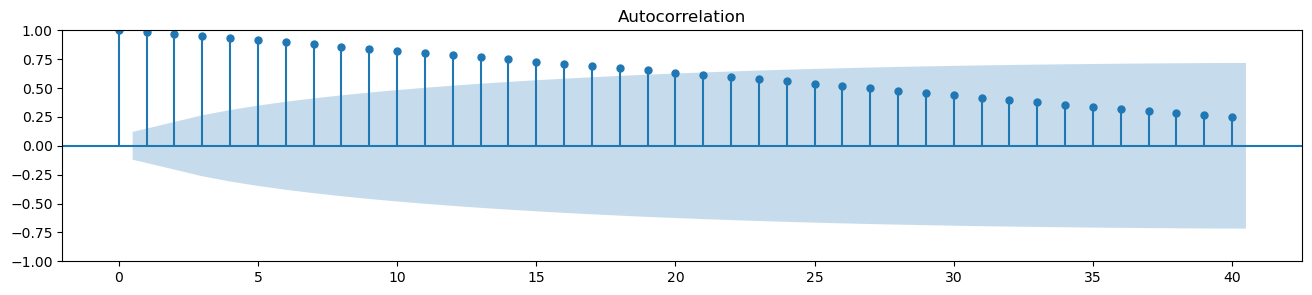

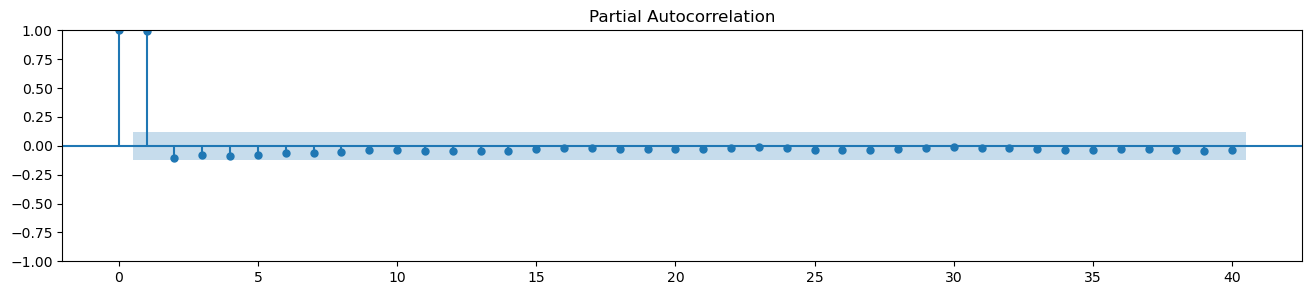

In [60]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(long_df, ax=ax, lags=40)

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series94804, ax=ax, lags=40, method="ywm")

In [61]:
mod_arma = ARIMA(series94804, order=(1,0,0))

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
res_arma = mod_arma.fit()

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [63]:
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2676.785
Date:                Tue, 10 Oct 2023   AIC                           5359.571
Time:                        12:56:06   BIC                           5370.310
Sample:                    04-01-1996   HQIC                          5363.886
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.807e+05    2.4e-11   1.17e+16      0.000    2.81e+05    2.81e+05
ar.L1          0.9993      0.002    426.246      0.000       0.995       1.004
sigma2      3.381e+07    9.3e-15   3.64e+21      0.0

In [64]:
print(res_arma.params)

const     2.807483e+05
ar.L1     9.992740e-01
sigma2    3.381152e+07
dtype: float64


In [65]:
mod1_arma = ARIMA(series94804, order=(0,0,1))
res1_arma = mod1_arma.fit()

# Print out summary information on the fit
print(res1_arma.summary())

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3360.408
Date:                Tue, 10 Oct 2023   AIC                           6726.817
Time:                        12:56:23   BIC                           6737.556
Sample:                    04-01-1996   HQIC                          6731.132
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.807e+05   3.64e+04      7.721      0.000    2.09e+05    3.52e+05
ma.L1          0.9854      0.443      2.223      0.026       0.117       1.854
sigma2      1.256e+10      0.034   3.65e+11      0.0

In [66]:
print(res1_arma.params)

const     2.807483e+05
ma.L1     9.854108e-01
sigma2    1.256433e+10
dtype: float64


## Trends?

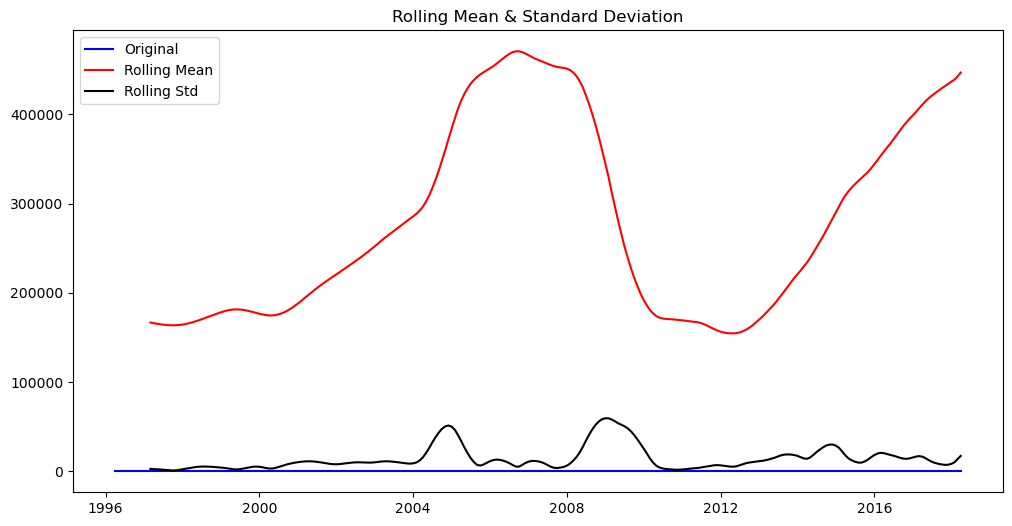

In [86]:
# Determine rolling statistics
roll_mean = series94804.rolling(window=12, center=False).mean()
roll_std = series94804.rolling(window=12, center=False).std()
# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [74]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value'])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

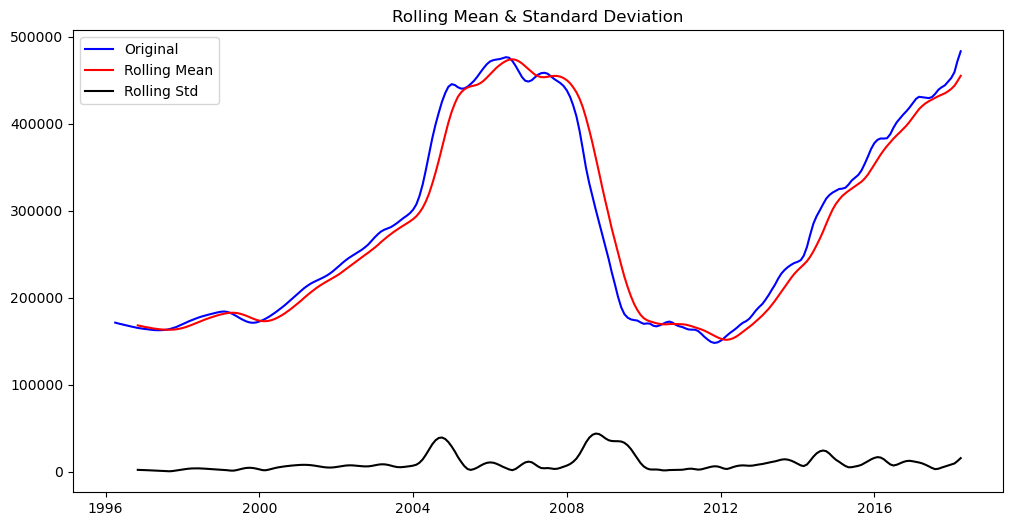

Results of Dickey-Fuller Test: 

Test Statistic                  -2.076817
p-value                          0.253938
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [75]:
stationarity_check(series94804)

### Log

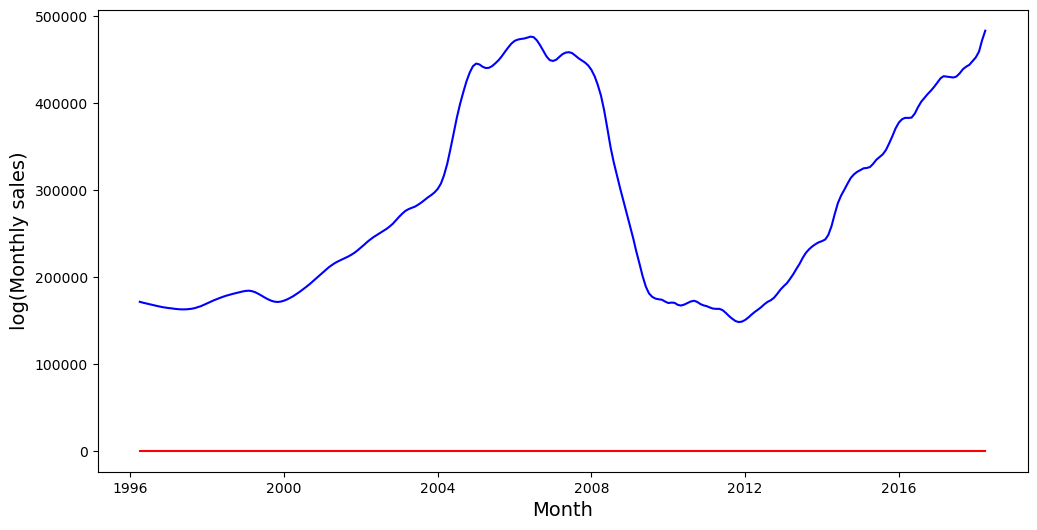

In [85]:
data = np.log(series94804)
fig = plt.figure(figsize=(12,6))
plt.plot(series94804, color='blue',label='Original')
plt.plot(data, color='red', label='log')
plt.xlabel('Month', fontsize=14)
plt.ylabel('log(Monthly sales)', fontsize=14)
plt.show()

### rolling mean

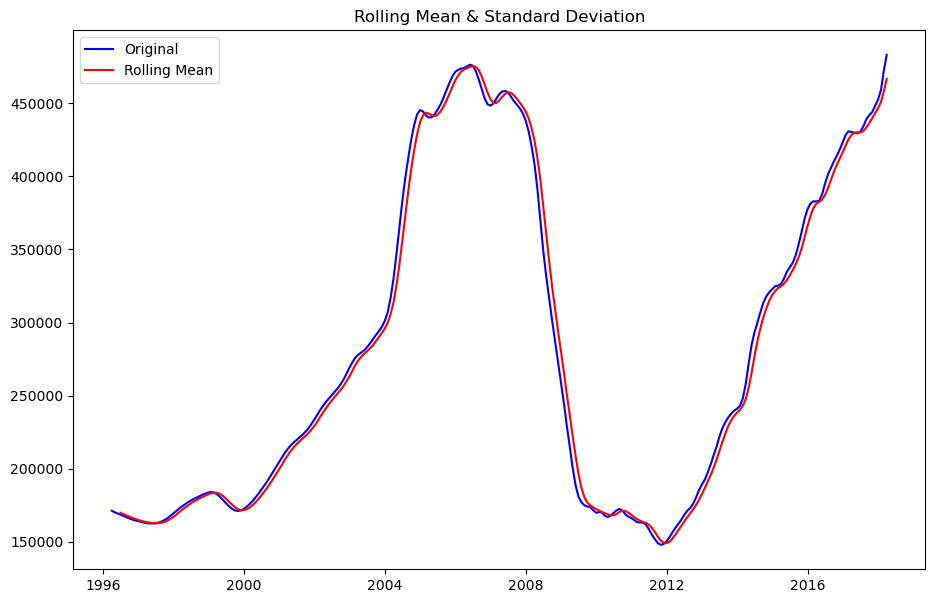

In [82]:
roll_mean = series94804.rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(series94804, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [67]:
data_diff = series94804.diff().dropna()
data_diff

,value
time,
1996-05-01,-1000.0
1996-06-01,-900.0
1996-07-01,-900.0
1996-08-01,-900.0
1996-09-01,-800.0
...,...
2017-12-01,4100.0
2018-01-01,4400.0
2018-02-01,6800.0


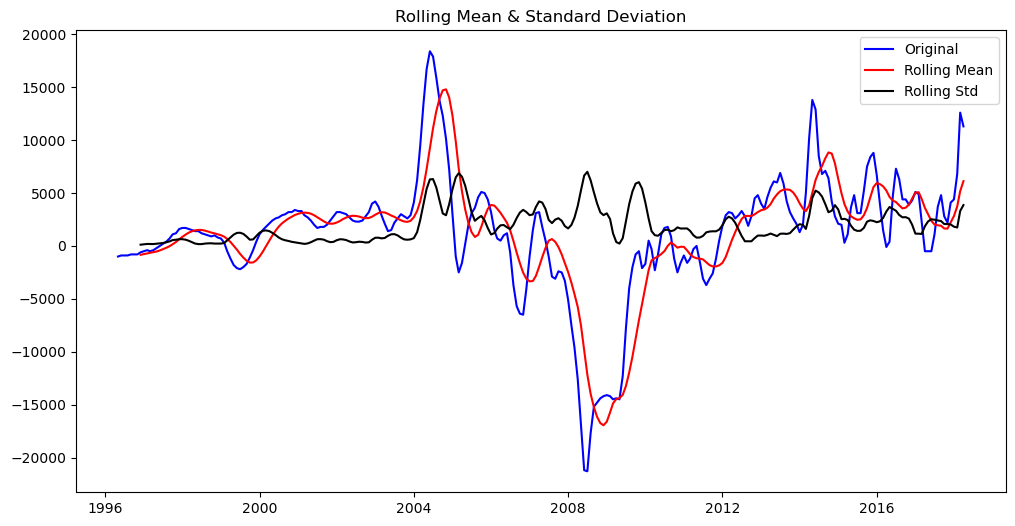

Results of Dickey-Fuller Test: 

Test Statistic                  -2.494253
p-value                          0.116879
#Lags Used                       7.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [76]:
stationarity_check(data_diff)

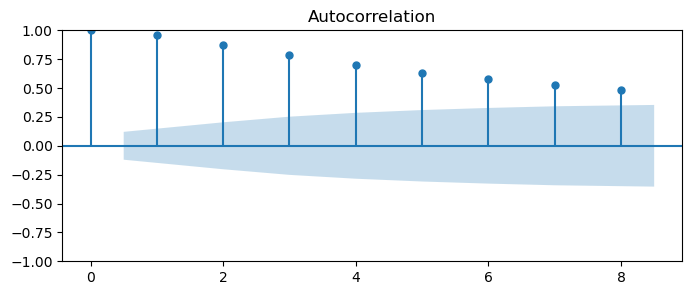

In [68]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(data_diff, ax=ax, lags=8);

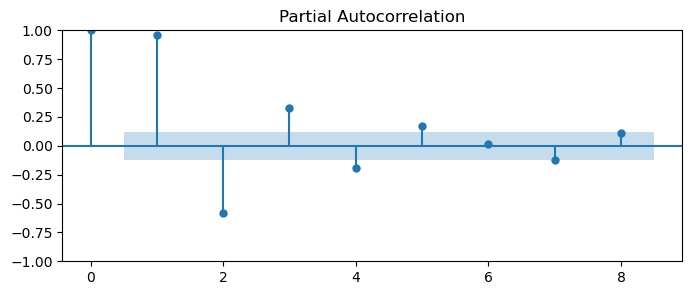

In [69]:
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(data_diff, ax=ax, lags=8, method="ywm");

In [70]:
mod2_arma = ARIMA(data_diff, order=(1, 0, 0))
res2_arma = mod2_arma.fit()

# Print out summary information on the fit
print(res2_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  264
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2305.888
Date:                Tue, 10 Oct 2023   AIC                           4617.775
Time:                        12:56:38   BIC                           4628.503
Sample:                    05-01-1996   HQIC                          4622.086
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1181.0609   2811.704      0.420      0.674   -4329.778    6691.899
ar.L1          0.9671      0.011     84.469      0.000       0.945       0.990
sigma2      2.244e+06    1.4e+05     16.017      0.0

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [71]:
mod3_arma = ARIMA(data_diff, order=(2, 0, 1))
res3_arma = mod3_arma.fit()

# Print out summary information on the fit
print(res3_arma.summary())

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  264
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2199.691
Date:                Tue, 10 Oct 2023   AIC                           4409.382
Time:                        12:56:53   BIC                           4427.262
Sample:                    05-01-1996   HQIC                          4416.567
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1181.0606   1513.756      0.780      0.435   -1785.847    4147.968
ar.L1          1.3517      0.051     26.655      0.000       1.252       1.451
ar.L2         -0.4244      0.056     -7.617      0.0

In [72]:
mod4_arma = ARIMA(data_diff, order=(2, 0, 2))
res4_arma = mod4_arma.fit()

# Print out summary information on the fit
print(res4_arma.summary())

C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lalyn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  264
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2185.447
Date:                Tue, 10 Oct 2023   AIC                           4382.894
Time:                        12:56:59   BIC                           4404.350
Sample:                    05-01-1996   HQIC                          4391.516
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1181.0460   1715.891      0.688      0.491   -2182.039    4544.131
ar.L1          0.7283      0.089      8.165      0.000       0.553       0.903
ar.L2          0.1559      0.098      1.590      0.1

# Modeling


# Evaluation

# Conclusions

# Next Steps and Limitations

# For More Information

See the full analysis in the [Jupyter Notebook](https://github.com/lalynjay/weather_classification/blob/main/weather_classification.ipynb) or review [this presentation](https://github.com/lalynjay/weather_classification/blob/main/weather_classification.pdf)

For additional info, contact Lynn Anderson at lalynjay@gmail.com

Repository Structure

├── data 

├── images

├── README.md

├── ts_presentation.pdf

└── notebook.ipynb